In [ ]:
from google.colab import files
uploaded = files.upload()


Saving dog-breed-identification.zip to dog-breed-identification.zip


In [ ]:
import zipfile
import os

zip_path = 'dog-breed-identification.zip'
extract_path = 'dog_data'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# 設定路徑
base_dir = os.path.join(extract_path, 'dog-breed-identification')
train_dir = os.path.join(base_dir, 'train')
labels_path = os.path.join(base_dir, 'labels.csv')
sample_submission_path = os.path.join(base_dir, 'sample_submission.csv')

In [ ]:
!pip install seaborn pillow

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os


In [ ]:
import zipfile

with zipfile.ZipFile('dog-breed-identification.zip', 'r') as zip_ref:
    zip_ref.extractall('dog_data')


In [ ]:
!ls dog_data
!ls dog_data/dog-breed-identification





labels.csv  sample_submission.csv  test  train
ls: cannot access 'dog_data/dog-breed-identification': No such file or directory


In [ ]:
import pandas as pd
import os

base_dir = 'dog_data'
labels_path = os.path.join(base_dir, 'labels.csv')
df = pd.read_csv(labels_path)

df['filename'] = df['id'] + '.jpg'
print(df.head())


                                 id             breed  \
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull   
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo   
2  001cdf01b096e06d78e9e5112d419397          pekinese   
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick   
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever   

                               filename  
0  000bec180eb18c7604dcecc8fe0dba07.jpg  
1  001513dfcb2ffafc82cccf4d8bbaba97.jpg  
2  001cdf01b096e06d78e9e5112d419397.jpg  
3  00214f311d5d2247d5dfe4fe24b2303d.jpg  
4  0021f9ceb3235effd7fcde7f7538ed62.jpg  


✅ 品種總數： 120

📊 前 5 名常見品種：
 breed
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
Name: count, dtype: int64


<ipython-input-7-bb6b457acbc2>:15: UserWarning: Glyph 21697 (\N{CJK UNIFIED IDEOGRAPH-54C1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-7-bb6b457acbc2>:15: UserWarning: Glyph 31278 (\N{CJK UNIFIED IDEOGRAPH-7A2E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-7-bb6b457acbc2>:15: UserWarning: Glyph 22294 (\N{CJK UNIFIED IDEOGRAPH-5716}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-7-bb6b457acbc2>:15: UserWarning: Glyph 29255 (\N{CJK UNIFIED IDEOGRAPH-7247}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-7-bb6b457acbc2>:15: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-7-bb6b457acbc2>:15: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-7-bb6b457acbc2>:15: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s

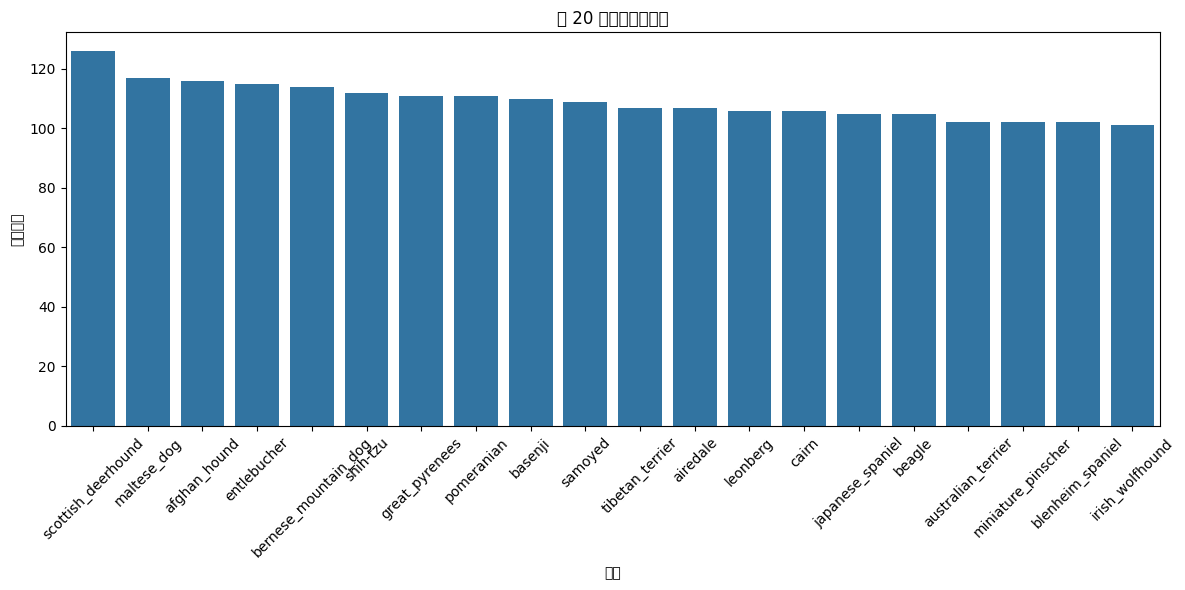

In [ ]:
df = pd.read_csv(labels_path)
df['filename'] = df['id'] + '.jpg'

print("品種總數：", df['breed'].nunique())
print("\n前5名常見品種：\n", df['breed'].value_counts().head())

# 長條圖
plt.figure(figsize=(12, 6))
top_breeds = df['breed'].value_counts()[:20]
sns.barplot(x=top_breeds.index, y=top_breeds.values)
plt.xticks(rotation=45)
plt.title("前20名常見的狗品種")
plt.xlabel("品種")
plt.ylabel("圖片數量")
plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=df,
    directory='dog_data/train',
    x_col='filename',
    y_col='breed',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

valid_generator = train_datagen.flow_from_dataframe(
    dataframe=df,
    directory='dog_data/train',
    x_col='filename',
    y_col='breed',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)


Found 8178 validated image filenames belonging to 120 classes.
Found 2044 validated image filenames belonging to 120 classes.


In [ ]:
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

num_classes = df['breed'].nunique()

model = Sequential([
    Input(shape=(150, 150, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


256/256 ━━━━━━━━━━━━━━━━━━━━ 314s 1s/step - accuracy: 0.0113 - loss: 4.9176 - val_accuracy: 0.0142 - val_loss: 4.7810
Epoch 2/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 333s 1s/step - accuracy: 0.0156 - loss: 4.7559 - val_accuracy: 0.0152 - val_loss: 4.6851
Epoch 3/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 311s 1s/step - accuracy: 0.0310 - loss: 4.6058 - val_accuracy: 0.0264 - val_loss: 4.6246
Epoch 4/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 314s 1s/step - accuracy: 0.0642 - loss: 4.3221 - val_accuracy: 0.0269 - val_loss: 4.5909
Epoch 5/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 301s 1s/step - accuracy: 0.1138 - loss: 3.8840 - val_accuracy: 0.0240 - val_loss: 4.6486
Epoch 6/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 309s 1s/step - accuracy: 0.1947 - loss: 3.3655 - val_accuracy: 0.0323 - val_loss: 4.7393
Epoch 7/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 305s 1s/step - accuracy: 0.2505 - loss: 2.9668 - val_accuracy: 0.0333 - val_loss: 4.9380
Epoch 8/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 326s 1s/step - accuracy: 0.3186 - loss: 2.5721 - val_accuracy: 0.035

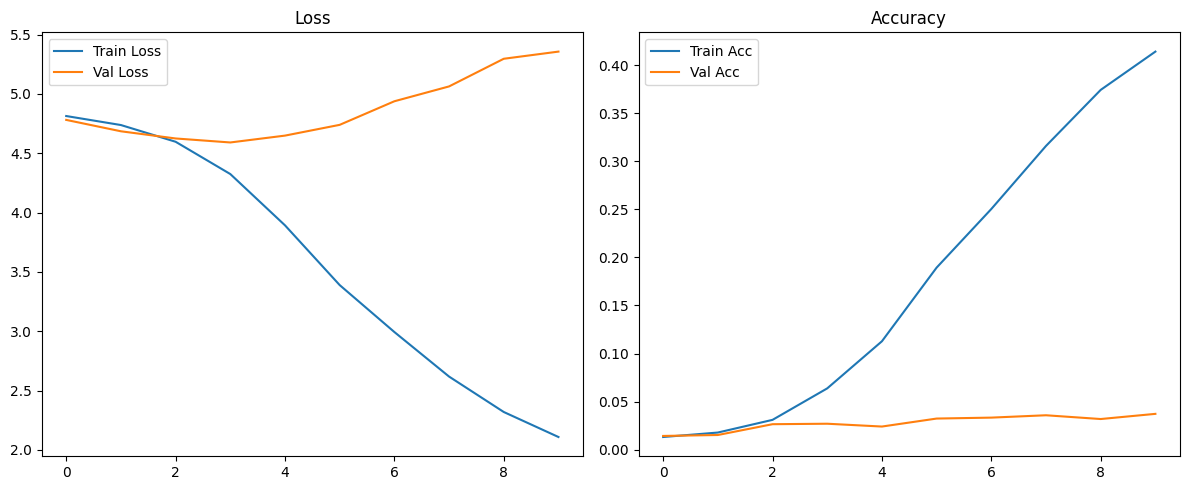

In [ ]:
import matplotlib.pyplot as plt

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10
)


#  loss、accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:

sample_submission = pd.read_csv(sample_submission_path)
test_df = pd.DataFrame({'filename': sample_submission['id'] + '.jpg'})

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=test_dir,
    x_col='filename',
    y_col=None,
    target_size=(150, 150),
    batch_size=32,
    class_mode=None,
    shuffle=False
)

# 預測
predictions = model.predict(test_generator, verbose=1)

# 類別對照
class_indices = train_generator.class_indices
inv_class_indices = {v: k for k, v in class_indices.items()}
breed_labels = [inv_class_indices[i] for i in range(len(inv_class_indices))]

# 組成 submission dataframe
submission = pd.DataFrame(predictions, columns=breed_labels)
submission.insert(0, 'id', sample_submission['id'])
submission.to_csv('submission.csv', index=False)

print("✅ 已成功產生 submission.csv，可下載上傳至 Kaggle！")




In [ ]:
import os
print(os.getcwd())


/content
